In [540]:
using Plots
using Distributions
using SpecialFunctions
using KernelDensity
plot();

# Start

In [5]:
Exit(;a=-2,b=2,x=0,Δ=0.01)=begin
    x
    it=0

    while a<x<b
        it+=1
        x+=rand(Normal())*√Δ
    end
    return it*Δ, b<=x
end

Exit (generic function with 1 method)

In [748]:
temp(x;n=1e3,typ=1,a=0,b=1,Δ=0.01)=mean(Exit(a=a,b=b,x=x,Δ=Δ)[typ] for i in 1:n)

temp (generic function with 1 method)

In [77]:
@time temp(0,n=1e7)

 10.509016 seconds (20.00 M allocations: 457.764 MiB, 0.72% gc time)


1.122666282000424

  1.563018 seconds (513.10 k allocations: 29.691 MiB, 0.53% gc time, 5.98% compilation time)


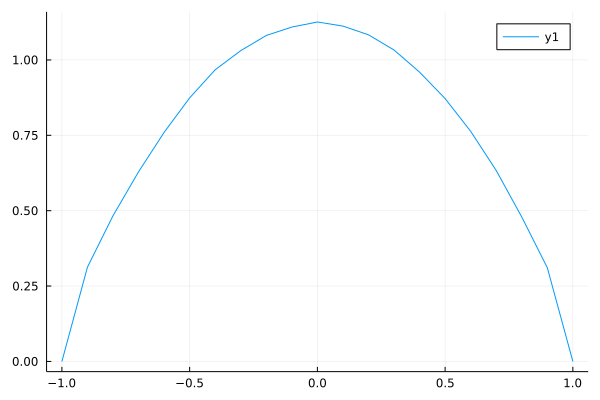

In [74]:
@time plot(-1:0.1:1, x->temp(x,n=1e5))

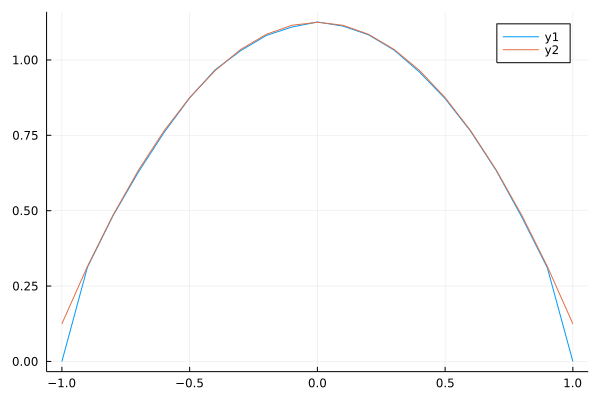

In [75]:
plot!(-1:0.1:1, x->-x^2+9/8)

 14.346591 seconds (20.64 M allocations: 644.528 MiB, 0.76% gc time, 0.69% compilation time)


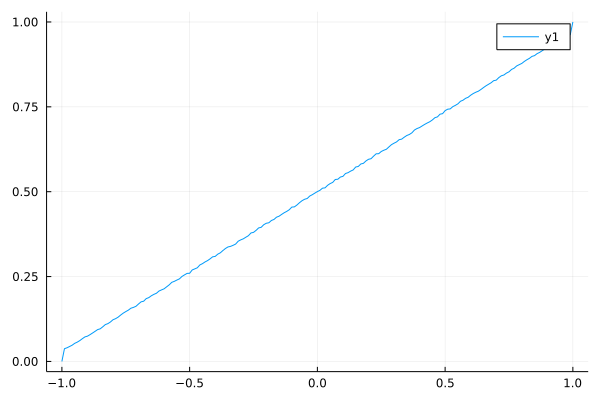

In [94]:
@time plot(-1:0.01:1, x->temp(x,n=1e5,typ=2,a=-1,b=1))

In [701]:
u2(n)= binomial(BigInt(2*n),BigInt(n))

u2 (generic function with 1 method)

In [702]:
p2(n)=u2(n)/4^BigInt(n)

p2 (generic function with 1 method)

In [713]:
p2(4545555)

0.0002646254400479850749748871703354178539281436752018606979140543379813370954250734

In [718]:
a=1
b=1.1
n=1e5
Δ=0.01

0.01

 14.657446 seconds (2.32 M allocations: 56.975 MiB, 0.12% gc time, 0.45% compilation time)


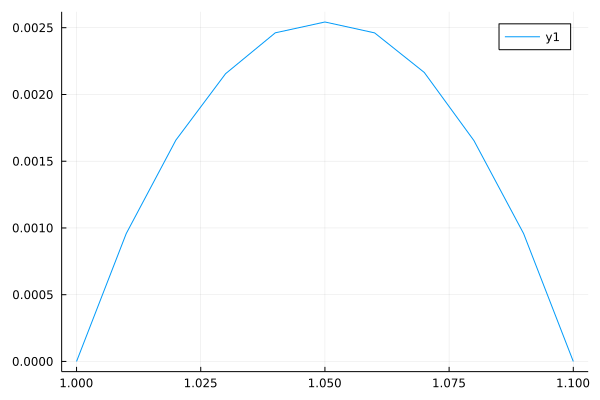

In [726]:
@time plot(a:Δ:b, x->temp(x,n=n,a=a,b=b,Δ=0.000001))

In [86]:
temp(0,n=1e7,a=-1/2,b=1/2)

0.31405545800071766

In [140]:
temp(-0.99,n=1e5,typ=2,a=-1,b=1)

0.03641

In [732]:
n=1e5
b=2

2

  7.822117 seconds (40.32 M allocations: 926.863 MiB, 1.83% gc time, 0.76% compilation time)


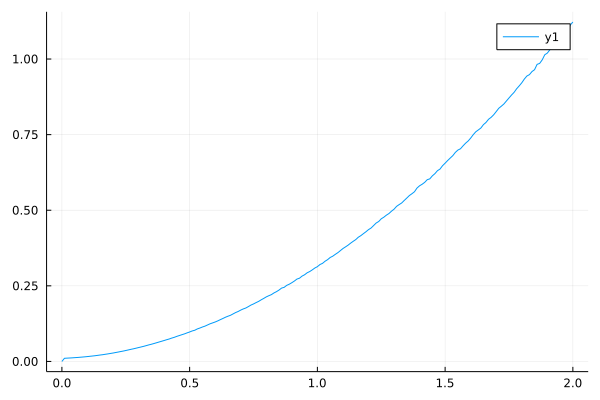

In [745]:
@time plot(0:Δ:b, c->temp(c/2,n=n,a=0,b=c,Δ=0.01))

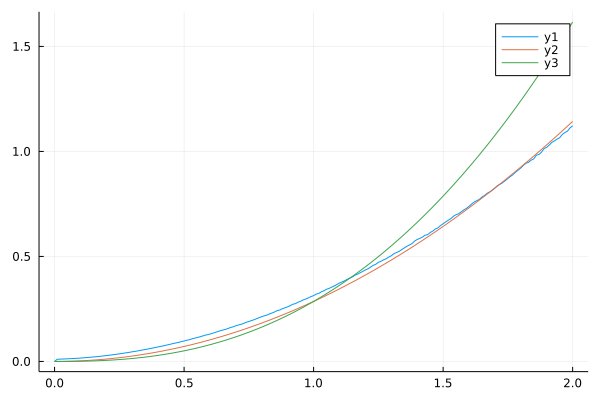

In [747]:
plot!(0:0.01:2, x->x^(5/2)/3.5)

In [737]:
sqrt(1.78^3)

2.3748162034144875

In [738]:
1/ans

0.4210852185370008

# Off

In [750]:
Exit(;a=-2,b=2,x=0,Δ=0.01)=begin
    x
    it=0

    while a<x<b
        it+=1
        x+=rand(Normal())*√Δ
    end
    return it*Δ, b<=x
end

Exit (generic function with 1 method)

In [749]:
temp(x;n=1e3,typ=1,a=0,b=1,Δ=0.01)=mean(Exit(a=a,b=b,x=x,Δ=Δ)[typ] for i in 1:n)

temp (generic function with 1 method)

In [802]:
temp(0.0001,Δ=0.000000001)

3.160048600000002e-5

157.551482 seconds (20.72 M allocations: 492.506 MiB, 0.06% gc time, 0.07% compilation time)


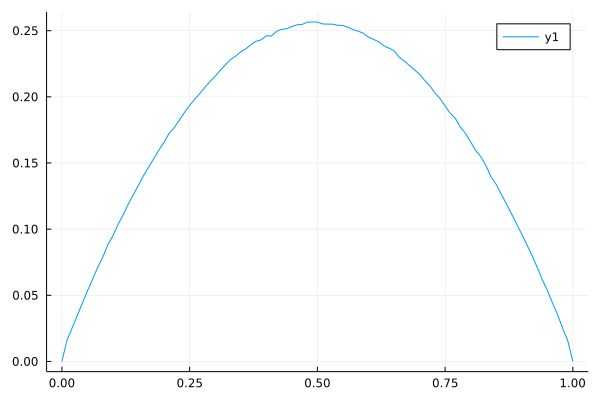

In [831]:
@time plot(0:0.01:1,x->temp(x,Δ=1e-4,n=1e5))

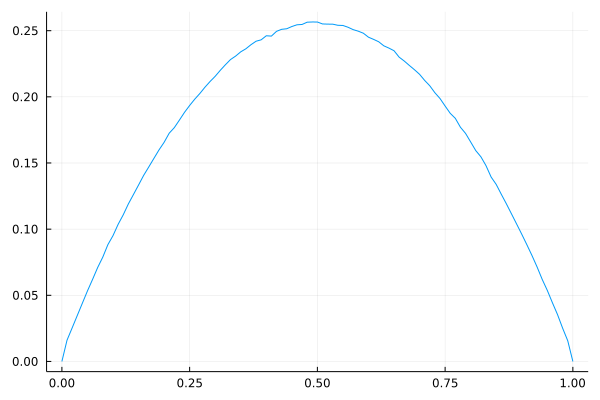

In [832]:
plt=deepcopy(plot!(leg=false))

 96.873175 seconds (20.73 M allocations: 492.863 MiB, 0.10% gc time, 0.10% compilation time)


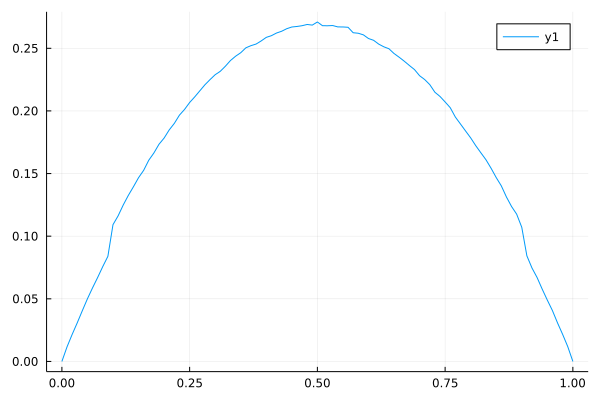

In [833]:
@time plot(0:0.01:1,x->temp(x,Δ= abs(x-1/2)>0.4 ? 1e-5 : 1e-3,n=1e5))

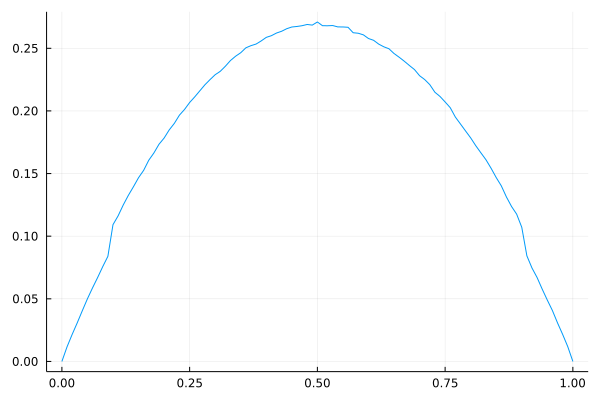

In [834]:
plt2=deepcopy(plot!(leg=false))

In [ ]:
savefig(plt2,"../")

In [825]:
@time temp(1/2,Δ=1e-6)

  2.192559 seconds (2.00 k allocations: 46.875 KiB)


0.24112222799999958

# Add

In [211]:
meantemp(b;n=1e3)= mean(Exit(a=0,b=b,x=x)[1] for x in rand(Int(n)).*b)

meantemp (generic function with 1 method)

In [414]:
meantemp(b;n=1e3, typ=true)= mean(Exit(a=0,b=b,x=typ ? x : b/2)[1] for x in rand(Int(n)).*b)

meantemp (generic function with 1 method)

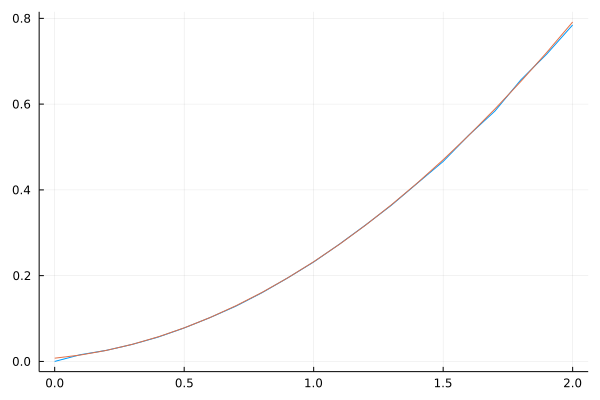

In [415]:
plot(0:0.1:2, b->meantemp(b,n=1e5),leg=false)
plot!(0:0.1:2, x->0.007555799877709273+x*0.05792407800892336+x^2*0.16701940026544787)

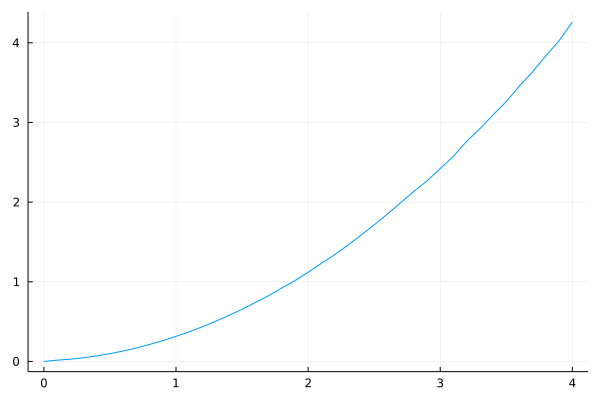

In [418]:
plot(0:0.1:4, b->meantemp(b,n=1e5,typ=false),leg=false)
#plot!(0:0.1:2, x->0.007555799877709273+x*0.05792407800892336+x^2*0.16701940026544787)

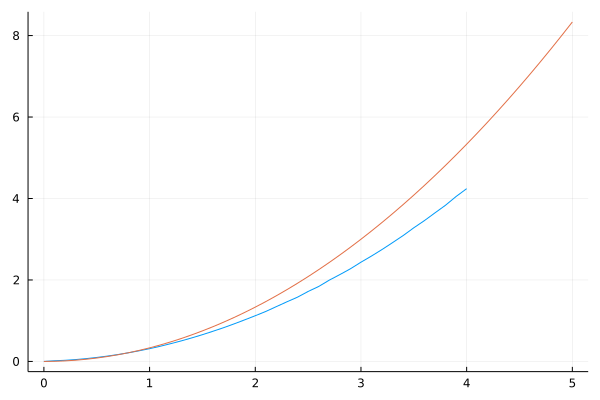

In [434]:
plot(0:0.1:4, b->meantemp(b,n=1e5,typ=false),leg=false)
plot!(0:0.1:4, x->x^2/3)

In [428]:
meantemp(2,n=1e6,typ=false)

1.122997159999926

In [429]:
4/ans

3.561896808359038

In [430]:
meantemp(4,n=1e6,typ=false)

4.232316599999959

In [431]:
16/ans

3.7804355184581784

In [432]:
meantemp(10,n=1e5,typ=false)

25.41533950000036

In [433]:
100/ans

3.9346316817840887

In [455]:
A=meantemp(10,n=1,typ=false)

27.8

In [571]:
using LsqFit

In [666]:
@. f(t,p)=(p[1]*p[2]/2)^(p[2]/2)/gamma(p[2]/2)*exp(-p[2]*p[1]/2/t)/t^(1+p[2]/2)

f (generic function with 2 methods)

In [675]:
D=kde([meantemp(1,n=1,typ=false) for i in 1:1e5])

UnivariateKDE{StepRangeLen{Float64, Base.TwicePrecision{Float64}, Base.TwicePrecision{Float64}, Int64}}(-0.05522388059701493:0.0013680741383458866:2.745223880597015, [6.34305303992555e-6, 8.633502927873904e-6, 1.1718111725858571e-5, 1.5847851546083036e-5, 2.1347291551121472e-5, 2.863378705678099e-5, 3.8241049686901785e-5, 5.084790795439886e-5, 6.731316934760478e-5, 8.871759714219885e-5  …  1.0162036389593787e-6, 9.334674035965662e-7, 9.245636474197738e-7, 9.97401601421366e-7, 1.1662795720568386e-6, 1.4534971741198e-6, 1.8915174696543247e-6, 2.5258257287941177e-6, 3.4186649467415897e-6, 4.653868000581429e-6])

In [677]:
fir=LsqFit.curve_fit(f, D.x[D.x .> 0], D.density[D.x .> 0], [1.,1.], lower=[0.01,0.01])

LsqFit.LsqFitResult{Vector{Float64}, Vector{Float64}, Matrix{Float64}, Vector{Float64}}([0.1952862024611087, 2.7527169020181144], [-0.06644369474451661, -0.0765856876247077, -0.08795801987617843, -0.10065882712408784, -0.11478676877569773, -0.13043995494990424, -0.14771477979157893, -0.16670462572567016, -0.18749793664174835, -0.21017334313168687  …  0.015329394520899518, 0.015312009322325184, 0.015294578541277465, 0.015277094209368788, 0.015259541969288113, 0.015241899462567654, 0.015224134167443447, 0.015206200540094071, 0.015188036279123221, 0.015169557493402435], [0.0 0.0; 0.0 0.0; … ; 0.09944766209066287 -0.009938843551751581; 0.09933857382862041 -0.009931074977015494], true, Float64[])

In [678]:
fir.param

2-element Vector{Float64}:
 0.1952862024611087
 2.7527169020181144

In [646]:
minimum(f(rand()*3.5,rand(2)*5) for i in 1:1e5)dd

3.937715847073793204646905544563050042489225252451724052644923675602702197956125e-17308

In [547]:
?nonlinear_fit

search: nonlinear_fit



# Nonlinear multi-variable least squares

Uses a Newton like algorithm to compute the least squares fit  of a model

## Parameters:

  * `x` an array where each colum is a variable
  * `fun` The function that should be fitted (more later on)
  * `a0` An initial guess for each fitting parameter
  * `eps` Convergence criterion
  * `maxiter` Maximum number of iterations

## Specifying the model

The model is specified in argument `fun` that should be callable according to the following signature:

`r = fun(x, a)`

where both `x` and `a` are vectors

The way the algorithm is implemented allows for the function to be implicit. This means that we are trying to fit the relationship `fun(x, a) = 0`. 

## Initial guess

The initial guess is important and should be as close as possible to the expeted values. It should, at least, give an order of magnitude of each parameter. Zero values are not recommended since in this  case no order of magnitude is available and it is assumed. The initial step is assumed to be `a0/10`.

## Convergence criterion

The initial guess `a0` will probably not fit the data very well. The largest value of `maxerr = maxabs(fun(x, a0))` (maximum error) is used as a reference and  every time a new approximation is computed, if the change in paramaters is compared to this reference error. If it is small, `maxabs(da) < eps*maxerr`, the algorithm converged.

## Return values

A tuple containing:

  * The estimated coefficients
  * A `Bool` stating whether the algorithm converged
  * Number of iterations it took to converge.


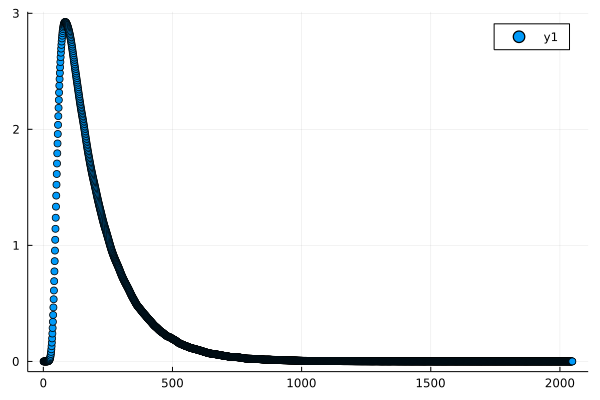

In [534]:
scatter(D.density)

In [575]:
?LsqFit.curve_fit

```
curve_fit(model, xdata, ydata, p0) -> fit
```

Fit data to a non-linear `model`. `p0` is an initial model parameter guess (see Example). The return object is a composite type (`LsqFitResult`), with some interesting values:

  * `fit.resid` : residuals = vector of residuals
  * `fit.jacobian` : estimated Jacobian at solution

additionally, it is possible to quiry the degrees of freedom with

  * `dof(fit)`
  * `coef(fit)`

## Example

```julia
# a two-parameter exponential model
# x: array of independent variables
# p: array of model parameters
model(x, p) = p[1]*exp.(-x.*p[2])

# some example data
# xdata: independent variables
# ydata: dependent variable
xdata = range(0, stop=10, length=20)
ydata = model(xdata, [1.0 2.0]) + 0.01*randn(length(xdata))
p0 = [0.5, 0.5]

fit = curve_fit(model, xdata, ydata, p0)
```


In [576]:
model(x, p) = p[1]*exp.(-x.*p[2])

model (generic function with 1 method)

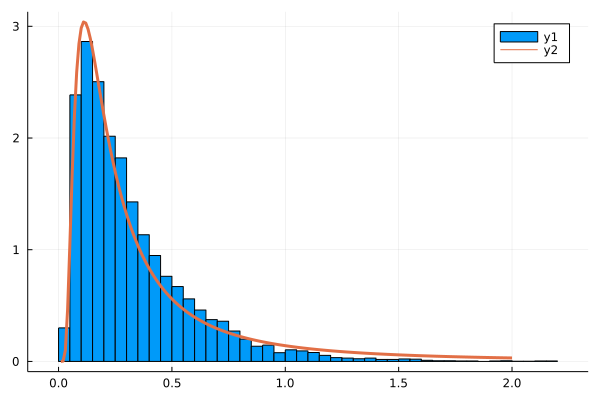

In [681]:
histogram([meantemp(1,n=1,typ=false) for i in 1:1e4], normed=true)
#plot!(0.01:0.01:2,t->0.4/sqrt(2*pi*t^3)*exp(-0.16/2/t), linewidth=4)
plot!(0:0.01:2,t->pdf(InverseGamma(fir.param[2]/2,prod(fir.param)/2),t),linewidth=3)


In [578]:
xdata = range(0, stop=10, length=20)
ydata = model(xdata, [1.0 2.0]) + 0.01*randn(length(xdata))
p0 = [0.5, 0.5]

fit = LsqFit.curve_fit(model, xdata, ydata, p0)

LsqFit.LsqFitResult{Vector{Float64}, Vector{Float64}, Matrix{Float64}, Vector{Float64}}([0.9976798043517004, 1.9909750460623634], [-0.0017562823336670919, 0.007970036353437016, -0.004758400628439352, -0.004378936181276702, -0.01725004288766082, -0.0027526979029260275, 0.008331357568788845, -0.0032911404935387916, -0.014870164647027806, 0.014043513068812718, -0.004435894525320869, -0.011104366364816298, -0.005725164769518282, 0.01824962938245793, -0.003770215328040253, -0.001568685865317596, -0.00823418972717284, -0.0032151209379305628, 0.007586370367069775, -0.021860359861620413], [1.0000000000052196 0.0; 0.3506798418727411 -0.18414010317208854; … ; 6.432748517770364e-9 -6.080013441323853e-8; 2.255973929077783e-9 -2.250588504135334e-8], true, Float64[])

In [581]:
fit.param

2-element Vector{Float64}:
 0.9976798043517004
 1.9909750460623634

# śmieci

In [ ]:
power_fit(x, y)# finds coeficients a and b for y[i] = a *x[i]^b

In [353]:
using CurveFit

In [373]:
B=rand(1000);

In [374]:
@time power_fit(B, meantemp.(B,n=4e3))

  0.394225 seconds (4.01 k allocations: 61.150 MiB, 1.71% gc time)


(0.1534385799557589, 0.8536853676226036)

In [375]:
B=rand(1000)*3;

In [376]:
@time power_fit(B, meantemp.(B,n=4e3))

  2.033977 seconds (4.01 k allocations: 61.150 MiB, 0.55% gc time)


(0.28356426451879285, 1.3038326889953986)

In [377]:
B=rand(1000)*5;

In [378]:
@time power_fit(B, meantemp.(B,n=4e3))

  5.307899 seconds (4.01 k allocations: 61.150 MiB, 0.10% gc time)


(0.31399853671808853, 1.4811449702218256)

In [379]:
B=rand(1000)*10;

In [380]:
@time power_fit(B, meantemp.(B,n=4e3))

 21.017872 seconds (4.01 k allocations: 61.150 MiB, 0.03% gc time)


(0.3202308673541554, 1.6448940857765326)

In [384]:
B=rand(1000);

In [385]:
@time exp_fit(B, meantemp.(B,n=4e3))

  0.398718 seconds (4.01 k allocations: 61.142 MiB, 2.04% gc time)


(0.014144836926225327, 3.0741577004008)

In [386]:
B=rand(1000)*3;

In [387]:
@time exp_fit(B, meantemp.(B,n=4e3))

  2.157179 seconds (4.01 k allocations: 61.142 MiB, 0.28% gc time)


(0.03798618091132304, 1.439593323589513)

In [400]:
B=rand(1000);

In [401]:
@time poly_fit(B, meantemp.(B,n=4e3),2)

  0.391748 seconds (4.02 k allocations: 61.207 MiB, 0.97% gc time)


3-element Vector{Float64}:
 0.008969358480739558
 0.052394018830445976
 0.17049565649707957

In [402]:
B=rand(1000)*3;

In [403]:
@time poly_fit(B, meantemp.(B,n=4e3),2)

  2.051872 seconds (4.02 k allocations: 61.207 MiB, 0.19% gc time)


3-element Vector{Float64}:
 0.00922245493210957
 0.05292939624975157
 0.16876200765155597

In [404]:
B=rand(1000)*10;

In [405]:
@time poly_fit(B, meantemp.(B,n=4e3),2)

 19.874680 seconds (4.02 k allocations: 61.207 MiB, 0.02% gc time)


3-element Vector{Float64}:
 0.007555799877709273
 0.05792407800892336
 0.16701940026544787

In [406]:
B=rand(1000);

In [407]:
@time poly_fit(B, meantemp.(B,n=4e3),3)

  0.422111 seconds (4.02 k allocations: 61.231 MiB, 2.09% gc time)


4-element Vector{Float64}:
  0.00950404654545868
  0.046920078533715395
  0.1821634965279159
 -0.006590265410131049

In [408]:
B=rand(1000)*3;

In [409]:
@time poly_fit(B, meantemp.(B,n=4e3),3)

  2.095847 seconds (4.02 k allocations: 61.231 MiB, 0.18% gc time)


4-element Vector{Float64}:
  0.008700768793840416
  0.0545032603925138
  0.16895907021068735
 -0.0005283436191286858

## test

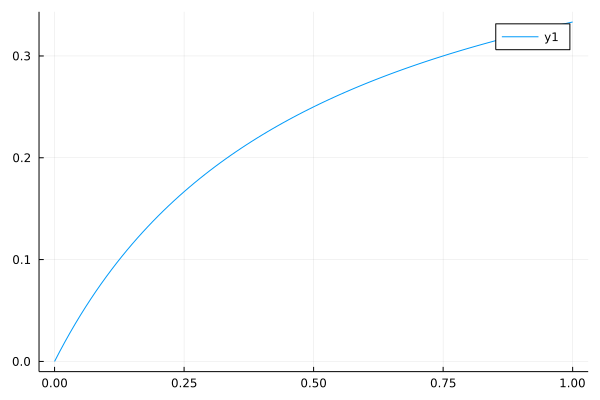

In [838]:
plot(0:0.01:1,x->x/(1+x+x))